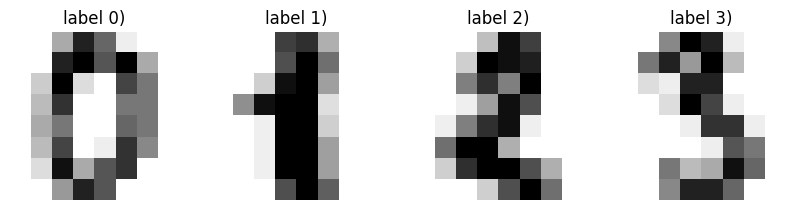

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'label {label})')



In [4]:
len(digits.images)

1797

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegression(max_iter=10000)

knn.fit(X_train, y_train) #vill inte skallera den är redan begränsad och skalera (tyo min max) 0 betyder nåt att det är tomt. Gräns max 256 (pixelrange 0-256)
log.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_log = log.predict(X_test)

print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        89
           2       1.00      0.99      0.99        83
           3       0.98      0.97      0.97        93
           4       0.99      0.99      0.99        93
           5       1.00      0.98      0.99        99
           6       1.00      1.00      1.00        98
           7       0.98      0.99      0.98        87
           8       0.96      0.96      0.96        83
           9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.95      0.93      0.94        89
           2       0.94      1.00      0.97        83
           3       0.99 

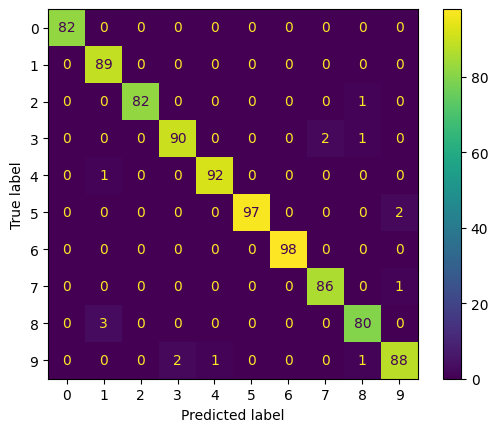

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cm).plot()


[Text(0.5, 1.0, 'Elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

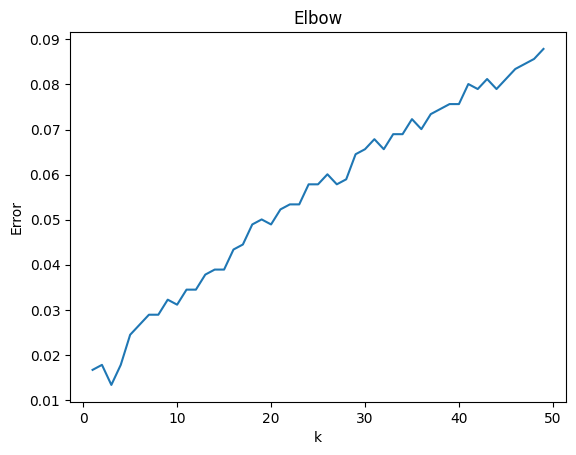

In [16]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(y_test, y_knn)
error_list = []

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train, y_train)
    y_hat = model_KNN.predict(X_test)
    error_list.append(1 - accuracy_score(y_test, y_hat))

fig, ax = plt.subplots()
ax.plot(range(1, len(error_list) + 1), error_list)
ax.set(title="Elbow", xlabel="k", ylabel="Error")

